In [10]:
mainfolder='airfoil2d/airFoil_400'
fields= ['U','p','nut','nuTilda']


x_lim=[-50, 50]
y_lim=[-20,20]

x_res=256
y_res=66


In [3]:
import numpy as np
import os
from scipy.interpolate import griddata
import meshio
import re

import matplotlib.pyplot as plt

In [4]:
mainfolderV=mainfolder+'/VTK/'



subfolders = os.listdir(mainfolderV)

folder = []
files = []

for j in subfolders:
    #print(mainfolder+'VTK/'+j)
    if os.path.isdir(mainfolderV+j) == True: 
        print(j)
        folder.append(j)
        files.append(j+'/'+'internal.vtu')

airFoil_400_0
airFoil_400_1
airFoil_400_10
airFoil_400_11
airFoil_400_12
airFoil_400_13
airFoil_400_14
airFoil_400_15
airFoil_400_16
airFoil_400_17
airFoil_400_18
airFoil_400_19
airFoil_400_2
airFoil_400_20
airFoil_400_3
airFoil_400_4
airFoil_400_5
airFoil_400_6
airFoil_400_7
airFoil_400_8
airFoil_400_9


In [5]:
id=[]
for txt in folder:
    t=txt.split('_')
    id.append(int(t[len(t)-1]))
index_max=np.argmax(id)

In [11]:
x = np.arange(x_lim[0],x_lim[1], (x_lim[1]-x_lim[0])/x_res)
y = np.arange(y_lim[0],y_lim[1], (y_lim[1]-y_lim[0])/y_res)
print(mainfolderV+files[index_max])
path2msh=mainfolderV+files[index_max]
grid_x, grid_y= np.meshgrid(x,y)

airfoil2d/airFoil_400/VTK/airFoil_400_20/internal.vtu
[-50.       -49.609375 -49.21875  -48.828125 -48.4375   -48.046875
 -47.65625  -47.265625 -46.875    -46.484375 -46.09375  -45.703125
 -45.3125   -44.921875 -44.53125  -44.140625 -43.75     -43.359375
 -42.96875  -42.578125 -42.1875   -41.796875 -41.40625  -41.015625
 -40.625    -40.234375 -39.84375  -39.453125 -39.0625   -38.671875
 -38.28125  -37.890625 -37.5      -37.109375 -36.71875  -36.328125
 -35.9375   -35.546875 -35.15625  -34.765625 -34.375    -33.984375
 -33.59375  -33.203125 -32.8125   -32.421875 -32.03125  -31.640625
 -31.25     -30.859375 -30.46875  -30.078125 -29.6875   -29.296875
 -28.90625  -28.515625 -28.125    -27.734375 -27.34375  -26.953125
 -26.5625   -26.171875 -25.78125  -25.390625 -25.       -24.609375
 -24.21875  -23.828125 -23.4375   -23.046875 -22.65625  -22.265625
 -21.875    -21.484375 -21.09375  -20.703125 -20.3125   -19.921875
 -19.53125  -19.140625 -18.75     -18.359375 -17.96875  -17.578125
 -17.187

In [20]:
mesh=meshio.read(path2msh)
points = mesh.points
boolArr= points[:,2] == 0.05

points_new=points[boolArr]
points_new=points_new[:,[0,1]]

df = np.empty((1,yres, xres,0))
[a,b,c,d]=df.shape

for field in fields:
        #print(field)
        df_temp=mesh.point_data[field]
        df_temp=df_temp[boolArr]
        df_temp=griddata(points_new, df_temp, (grid_x, grid_y), method='linear')
        df_temp=np.array(df_temp)
        if field != 'U':
            df_temp=df_temp.reshape(a,b,c,1)
        if field == 'U':
            df_temp=df_temp.reshape(a,b,c,3)
        df=np.concatenate((df,df_temp),axis=3)

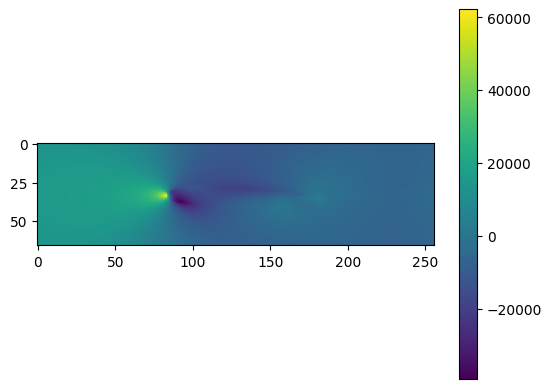

In [21]:
plt.imshow(df[0,:,:,3])
plt.colorbar()

In [130]:
print(df.shape)

(1, 66, 256, 6)


In [14]:
np.save(mainfolder+'/input',df)
print(mainfolder+'input')

airfoil2d/airFoil_400input
